# __Problem Statement__
The problem statement is to predict the likelihood of a loan being approved based on various factors such as applicant income, credit history, loan amount, and other demographic details.

# __Hypothesis__
We hypothesize that the likelihood of being eligible for a loan is influenced by a combination of applicant income, credit history, loan amount, and demographic details. As higher income can indicate financial stability, we also hypothesize that higher income will have a positive correlation with loan approval probability.

# __Business goals__
The goal is to develop a machine learning model that can accurately classify loan applications as either approved or rejected, thereby helping lenders make informed decisions.

Business Understanding:
The business understanding of this problem is that lenders are looking for a way to reduce the risk of loan defaults by identifying applicants who are more likely to repay their loans. By analyzing various factors such as income, credit history, and loan amount, lenders can make more informed decisions about which applicants to approve and which to reject.

The business goals of this project are:

1.	Risk Reduction: Reduce the risk of loan defaults by identifying applicants who are more likely to repay their loans.

2.	Improved Decision Making: Develop a machine learning model that can accurately classify loan applications as either approved or rejected, thereby helping lenders make informed decisions.

3.	Increased Efficiency: Automate the loan approval process by using a machine learning model, reducing the need for manual review and increasing the speed of the approval process.

The key performance indicators (KPIs) for this project will be:

1.	Accuracy: The accuracy of the machine learning model in classifying loan applications as either approved or rejected.

2.	Precision: The precision of the machine learning model in identifying applicants who are more likely to repay their loans.

3.	Recall: The recall of the machine learning model in identifying applicants who are more likely to default on their loans.

By achieving these goals and KPIs, the project aims to improve the efficiency and effectiveness of the loan approval process, while also reducing the risk of loan defaults and increasing the overall profitability of the lending institution.


# __Getting the system ready and loading the data__

## Import libraries

In [41]:
# Supress warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

import pandas as pd
import skimpy as sk #for data profiling

### Collect data

In [42]:
df = pd.read_csv('./data-for-project-1/raw_data.csv') #read the raw data from the raw_data.csv file
df.head() #show all features with first few rows of data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


We can see that the raw data consists of 12 features as well as the target attribute which is the loan status of each row entry. We notice that the data has a target attribute, Loan_Status, which informs us that we must apply classification machine learning models to predict outcomes. Therefore we can now plan and prepare our data accordingly.

## Preprocessing and cleaning the data

### Removing irrelevant features

The Loan_ID feature will be irrelevant to our models, thus we can remove it.

In [43]:
irrelevant_features = 'Loan_ID' #feature to be removed
#removing of feature
df.drop(
    columns=irrelevant_features,
    inplace=True
)
#display data without Loan_ID
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Change the target, Loan_Status, to int values

We want to convert the target data type from a string to an int value (0 and 1) to make data preparation and exploration easier.

In [44]:

df['Loan_Status'].replace({'Y': 1, 'N': 0},inplace = True)

df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


### Checking the cardinality of the features

In [45]:
# checking the cardinality of features
feature_cardinality = df.select_dtypes("object").nunique()
feature_cardinality

Gender           2
Married          2
Dependents       4
Education        2
Self_Employed    2
Property_Area    3
dtype: int64

There is no need to handle the cardinality of the features as no features have very low cardinality or very high cardinality.

### Understanding and profiling the data
Use the skimpy library to profile the data

In [46]:
sk.skim(df) #profile the dataframe of raw data

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 614    │ │ string      │ 6     │                                                          │
│ │ Number of columns │ 12     │ │ float64     │ 4     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA  ┃ NA %   ┃ mean   ┃ sd     ┃ p0   ┃ p25    ┃ p50   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ ApplicantIncome        │   0 │      0 │   5400 │   6100 │  150 │   2900 │  3800 │  5800 │  81000 │    ▇    │  │
│ │ CoapplicantIncome      │   0 │      0 │   1600 │   2900 │    0 │      0 │  1200 │  2300 │  42000 │    ▇    │  │
│ │ LoanAmount             │  22 │   3.58 │    150 │     86 │    9 │    100 │   130 │   170 │    700 │   ▇▇▁   │  │
│ │ Loan_Amount_Term       │  14 │   2.28 │    340 │     65 │   12 │    360 │   360 │   360 │    480 │    ▁ ▇  │  │
│ │ Credit_History         │  50 │   8.14 │   0.84 │   0.36 │    0 │      1 │     1 │     1 │      1 │ ▁    ▇  │  │
│ │ Loan_Status            │   0 │      0 │   0.69 │   0.46 │    0 │      0 │     1 │     1 │      1 │ ▃    ▇  │  │
│ └────────────────────────┴─────┴────────┴────────┴────────┴──────┴────────┴───────┴───────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                  ┃ NA     ┃ NA %       ┃ words per row               ┃ total words             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Gender                       │     13 │       2.12 │                        0.98 │                     601 │  │
│ │ Married                      │      3 │       0.49 │                           1 │                     611 │  │
│ │ Dependents                   │     15 │       2.44 │                        0.98 │                     599 │  │
│ │ Education                    │      0 │          0 │                         1.2 │                     748 │  │
│ │ Self_Employed                │     32 │       5.21 │                        0.95 │                     582 │  │
│ │ Property_Area                │      0 │          0 │                           1 │                     614 │  │
│ └──────────────────────────────┴────────┴────────────┴─────────────────────────────┴─────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

According to the skimpy summary above, we notice that there are 3 numeric features and 9 categorical features (which we will be encoding for better data understanding). The features LoanAmount, Loan-Amount_Term, Credit_History, Gender, Married, Dependents, and Self_Employed have missing values. Credit_History must also be changed to a string feature as it is categorical.

### Handling missing values

In [47]:

df['LoanAmount'].fillna(
    df['LoanAmount']
    .dropna()
    .mean(),
    inplace=True
)

col_cat = ['Gender','Married','Dependents','Self_Employed','Credit_History','Loan_Amount_Term']
for col in col_cat:
    df[col].fillna(
        df[col]
        .mode()[0],
        inplace=True
    )

sk.skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 614    │ │ string      │ 6     │                                                          │
│ │ Number of columns │ 12     │ │ float64     │ 4     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA  ┃ NA %   ┃ mean   ┃ sd     ┃ p0   ┃ p25    ┃ p50   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ ApplicantIncome        │   0 │      0 │   5400 │   6100 │  150 │   2900 │  3800 │  5800 │  81000 │    ▇    │  │
│ │ CoapplicantIncome      │   0 │      0 │   1600 │   2900 │    0 │      0 │  1200 │  2300 │  42000 │    ▇    │  │
│ │ LoanAmount             │   0 │      0 │    150 │     84 │    9 │    100 │   130 │   160 │    700 │   ▇▇▁   │  │
│ │ Loan_Amount_Term       │   0 │      0 │    340 │     64 │   12 │    360 │   360 │   360 │    480 │    ▁ ▇  │  │
│ │ Credit_History         │   0 │      0 │   0.86 │   0.35 │    0 │      1 │     1 │     1 │      1 │ ▁    ▇  │  │
│ │ Loan_Status            │   0 │      0 │   0.69 │   0.46 │    0 │      0 │     1 │     1 │      1 │ ▃    ▇  │  │
│ └────────────────────────┴─────┴────────┴────────┴────────┴──────┴────────┴───────┴───────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                  ┃ NA     ┃ NA %       ┃ words per row               ┃ total words             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Gender                       │      0 │          0 │                           1 │                     614 │  │
│ │ Married                      │      0 │          0 │                           1 │                     614 │  │
│ │ Dependents                   │      0 │          0 │                           1 │                     614 │  │
│ │ Education                    │      0 │          0 │                         1.2 │                     748 │  │
│ │ Self_Employed                │      0 │          0 │                           1 │                     614 │  │
│ │ Property_Area                │      0 │          0 │                           1 │                     614 │  │
│ └──────────────────────────────┴────────┴────────────┴─────────────────────────────┴─────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

The missing values have been handled as we notice in the skimpy summary there are no NA values in any of the features.

### Encoding categorical variables

We encode the categorical features to showcase the possible values of each feature as well as what categorical value each row entry has as an encoded variable.

In [48]:
from category_encoders import OneHotEncoder

ohe = OneHotEncoder(
    use_cat_names=True,
    cols=['Gender','Married','Dependents','Self_Employed','Education','Property_Area','Credit_History','Loan_Amount_Term']
)

encoded_df = ohe.fit_transform(df)
encoded_df.head()

,Gender_Male,Gender_Female,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,...,Loan_Amount_Term_480.0,Loan_Amount_Term_36.0,Loan_Amount_Term_84.0,Loan_Amount_Term_12.0,Credit_History_1.0,Credit_History_0.0,Property_Area_Urban,Property_Area_Rural,Property_Area_Semiurban,Loan_Status
0,1,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,1
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
2,1,0,0,1,1,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,1
3,1,0,0,1,1,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,1
4,1,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,1


In [49]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender_Male              614 non-null    int64  
 1   Gender_Female            614 non-null    int64  
 2   Married_No               614 non-null    int64  
 3   Married_Yes              614 non-null    int64  
 4   Dependents_0             614 non-null    int64  
 5   Dependents_1             614 non-null    int64  
 6   Dependents_2             614 non-null    int64  
 7   Dependents_3+            614 non-null    int64  
 8   Education_Graduate       614 non-null    int64  
 9   Education_Not Graduate   614 non-null    int64  
 10  Self_Employed_No         614 non-null    int64  
 11  Self_Employed_Yes        614 non-null    int64  
 12  ApplicantIncome          614 non-null    int64  
 13  CoapplicantIncome        614 non-null    float64
 14  LoanAmount               6

We can clearly see now that encoding the categorical features will return numeric values. We will make use of encoding when building ou models to ensure all features fit the possible models we will be implementing.

### Creating a prepare data function

We will combine our data preparation code into a function that we can call to prepare raw data for modelling. The function will return a dataframe of prepared data.

In [50]:
def prepare_data(path):
    prep_df = pd.read_csv(path) #read the raw data from the raw_data.csv file
    
    irrelevant_features = 'Loan_ID' #feature to be removed
    #removing of feature
    prep_df.drop(
        columns=irrelevant_features,
        inplace=True
    )

    if 'Loan_Status' in prep_df.columns:
        prep_df['Loan_Status'].replace({'Y': 1, 'N': 0},inplace = True)#replace loan status values with int values

    #Handling of missing data
    prep_df['LoanAmount'].fillna(
    prep_df['LoanAmount']
    .dropna()
    .mean(),
    inplace=True
    )

    col_cat = ['Gender','Married','Dependents','Self_Employed','Credit_History','Loan_Amount_Term']
    for col in col_cat:
        prep_df[col].fillna(
            prep_df[col]
            .mode()[0],
            inplace=True
        )

    #clean column names
    from skimpy import clean_columns
    return clean_columns(prep_df)

### Calling the prepare_data function and writing to a file

In [51]:
prepared_df = prepare_data('./data-for-project-1/raw_data.csv')
prepared_df.to_csv('./data-for-project-1/prepared_data.csv')

## __Data exploration__

In [52]:
# For Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sn

### High Collinearity

In [53]:
corr_df = df.select_dtypes("number").corr() #checking the correlation between the number features
corr_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.565620,-0.046531,-0.018615,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059383,0.011134,-0.059187
LoanAmount,0.565620,0.187828,1.000000,0.036475,-0.001431,-0.036416
Loan_Amount_Term,-0.046531,-0.059383,0.036475,1.000000,-0.004705,-0.022549
Credit_History,-0.018615,0.011134,-0.001431,-0.004705,1.000000,0.540556
Loan_Status,-0.004710,-0.059187,-0.036416,-0.022549,0.540556,1.000000


In [54]:
fig = px.imshow(corr_df, color_continuous_scale='Spectral')
fig.update_layout(title='Heat Map: Correlation of Features', font=dict(size=12))
fig.show()

From the correlation matrix displayed, we can see that there is high multi-collinearity on Credit_History against the Loan_Status. As Loan_Status is our target, we could look to drop the Credit_History feature. We also notice high multi-collinearity on LoanAmount against ApplicantIncome. Since income is more important for loan eligibility, we could look to drop the LoanAmount feature.

### Univariate analysis

In [55]:
# Prepare data to display
labels = (
    df['Loan_Status']
    .astype('str')
    .str.replace('0','No', regex=True)
    .str.replace('1','Yes', regex=True)
    .value_counts()
)

# Create figure using Plotly
fig = px.bar(
    data_frame=labels, 
    x=labels.index, 
    y=labels.values, 
    title=f'Class Imbalance', 
    color=labels.index
)

# Add titles & Display figure
fig.update_layout(xaxis_title='Loan Status', yaxis_title='Number of Customers')
fig.show()

The BC Finance company would like to decrease the number of customers who are not eligible for a loan, which is depicted by the orange bar labeled N in the graph above.

### Bivariate/Multivariate analysis

We will now compare each feature against the target to gain insights on how features influence the target positively as well as negatively.

#### Analysis of numeric features 

In [56]:
#Gaining insights on which features to use as numeric and categorical
df.select_dtypes('number').nunique()

ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      10
Credit_History         2
Loan_Status            2
dtype: int64

In [57]:
# Select features to plot
plot_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# Plot numeric features against target
plt.Figure(figsize=(3,4))
for col in plot_cols:
    fig = px.box(data_frame=df[plot_cols], x=col, color=df['Loan_Status'], title=f'BoxPlot for {col} Feature against the Target')
    fig.update_layout(xaxis_title=f'{col} Feature')
    fig.show()

For all three numeric features we notice that they have a similar impact on both the positive and negative outcome of the target. There is however a considerable amount of outliers that we will be treating.

##### Visualization of numeric features without outliers

We will be looking at visualizations of the numeric features again but this time whithout the outliers.

In [58]:
mask_appincome = df['ApplicantIncome'] < 6000 #mask for filtering the ApplicantIncome feature
df_mask1 = df[mask_appincome] #filtered dataframe from the applicant income mask 
mask_coincome = df['CoapplicantIncome'] < 2300 #mask for filtering the CoapplicantIncome feature
df_mask2 = df[mask_coincome] #filtered dataframe from the coapplicant income mask
mask_loanamount_upper = df['LoanAmount'] < 175 #mask for filtering the LoanAmount feature
mask_loanamount_lower = df['LoanAmount'] > 35
df_mask3 = df[mask_loanamount_upper & mask_loanamount_lower] #filtered dataframe from the loan amount mask

plot_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

plt.Figure(figsize=(3,4))
for col in plot_cols:
    if col == 'ApplicantIncome':
        fig = px.box(data_frame=df_mask1, x=col, color= df_mask1['Loan_Status'],
        title=f'BoxPlot for {col} Feature against the Target without outliers')
        fig.update_layout(xaxis_title=f'{col} Feature')
        fig.show()
    elif col == 'CoapplicantIncome':
        fig = px.box(data_frame=df_mask2, x=col, color= df_mask2['Loan_Status'],
        title=f'BoxPlot for {col} Feature against the Target without outliers')
        fig.update_layout(xaxis_title=f'{col} Feature')
        fig.show()
    else:
        fig = px.box(data_frame=df_mask3, x=col, color= df_mask3['Loan_Status'],
        title=f'BoxPlot for {col} Feature against the Target without outliers')
        fig.update_layout(xaxis_title=f'{col} Feature')
        fig.show()

By removing the outliers we now see that there is a slight differnce in the effect of the features on the loan status. The most obvious one lies with the loan amount where higher loan amounts tend to result in more negative loan status outcomes.

#### Analysis of categorical features

We will now compare each categorical feature against the loan status.

In [59]:
cat_col = ['Loan_Amount_Term','Credit_History','Gender','Married','Dependents','Education','Self_Employed','Property_Area']
for col in cat_col:
    # Aggregate Category Feature
    new_df = pd.DataFrame(
        df[[col, 'Loan_Status']]
        .groupby(['Loan_Status'])
        .value_counts()
        .reset_index()
        )
    
    # Plot Category feature vs label
    fig = px.bar(
        data_frame=new_df, 
        x=col, 
        y='count', 
        facet_col='Loan_Status', 
        color=new_df['Loan_Status'].astype(str), # convert it to string to avoid continuous scale on legend
        title=f'{col} vs Target'
    )

    fig.update_layout(xaxis_title=col, yaxis_title='Number of Customers')
    fig.show()

When looking at these visuals, we will focus on the effect of the features on the negative loan outcome as this is what is significant for the company.
The loan amount term visual indicates an increase in denied loan as the term increases.
Credit history shows more negative outcomes when credit history is evident.
Gender shows that more males are denied loans than females.
More married individuals are denied loans than single individuals. 
Having less dependents indicates an increased chance of being denied a loan.
More customers who have graduated are denied loans than ungraduated customers.
Customers who are not self employed are more likely to not get a loan.
Customers from rural and urban areas are more likely to not receive a loan.

## __Evaluation metrics for this classification problem__

Libraries to be used during classification evalutions:

In [60]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from category_encoders import OneHotEncoder

# Metric variables to be used for output
accuracy_scores = []
precisions = []
f1_scores = []
recalls = []

Datasets to be used for the Logistic Regression and Decision Tree alogrithms:

In [61]:
# Split loan status data
label = 'loan_status'
x = prepared_df.drop(columns=[label], inplace=False)
y = prepared_df[label]

x_Train, x_Val, y_Train, y_Val = train_test_split(x, y, test_size=0.4, random_state=42)

print(
    f'Training dataset \
    \nx_Train: {x_Train.shape[0]/len(x)*100:.0f}% \ny_Train: {y_Train.shape[0]/len(x)*100:.0f}% \
    \n\nValidation dataset \
    \nx_Val: {x_Val.shape[0]/len(x)*100:.0f}% \ny_Val: {y_Val.shape[0]/len(x)*100:.0f}%'
)

Training dataset     
x_Train: 60% 
y_Train: 60%     

Validation dataset     
x_Val: 40% 
y_Val: 40%


### Baseline accuracy

In [62]:
accuracy_Base = y_Train.value_counts(normalize=True).max()

print("Baseline Accuracy:", round(accuracy_Base, 2))

Baseline Accuracy: 0.71


### Logistic Regression evaluation

In [63]:
# Model building and fitting
regression_Model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    LogisticRegression(max_iter=2500)
)
regression_Model.fit(x_Train, y_Train)

# Display accuracy scores
lr_train_acc = regression_Model.score(x_Train, y_Train)
lr_val_acc = regression_Model.score(x_Val, y_Val)
print("Logistic Regression training accuracy:", lr_train_acc)
print("Logistic Regression validation accuracy:", lr_val_acc)

y_val_pred_reg = regression_Model.predict(x_Val)

accuracy_scores.append(round(accuracy_score(y_Val, y_val_pred_reg),4)), 
precisions.append(round(precision_score(y_Val, y_val_pred_reg),4)), 
recalls.append(round(recall_score(y_Val, y_val_pred_reg),4)), 
f1_scores.append(round(f1_score(y_Val, y_val_pred_reg),4))

Logistic Regression training accuracy: 0.8179347826086957
Logistic Regression validation accuracy: 0.7764227642276422


C:\Users\User-PC\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



### Decision Tree evaluation

In [64]:
depth_hyperpar = range(1, 8)

# List of scores per each set for visualization purpose
training_Scores = []
validation_Scores = []

for d in depth_hyperpar:
    # Model building and fitting
    tree_Model = make_pipeline(
        OneHotEncoder(use_cat_names=True),
        DecisionTreeClassifier(max_depth=d, random_state=42)
    )
    tree_Model.fit(x_Train, y_Train)
    
    # Calculate training accuracy score and append to `training_scores`
    training_Scores.append(tree_Model.score(x_Train, y_Train))
    
    # Calculate validation accuracy score and append to `validation_scores`
    validation_Scores.append(tree_Model.score(x_Val, y_Val))

tune_data = pd.DataFrame(
    data = {'Training': training_Scores, 'Validation': validation_Scores}, 
    index=depth_hyperpar
)

fig = px.line(
    data_frame=tune_data, 
    x=depth_hyperpar, 
    y=['Training', 'Validation'], 
    title="Decision Tree Model training & validation curves"
)
fig.update_layout(xaxis_title ="Maximum Depth", yaxis_title="Accuracy Score")
fig.show()

y_val_pred_tree = tree_Model.predict(x_Val)

accuracy_scores.append(round(accuracy_score(y_Val, y_val_pred_tree),4)), 
precisions.append(round(precision_score(y_Val, y_val_pred_tree),4)), 
recalls.append(round(recall_score(y_Val, y_val_pred_tree),4)), 
f1_scores.append(round(f1_score(y_Val, y_val_pred_tree),4))

In [65]:
# Compare evaluation metrics for Logistic regression and Decision tree 
metrics_1 = {
        'Accuracy': accuracy_scores,
        'Precision': precisions,
        'F1-Score': f1_scores, 
        'Recall': recalls
    }

pd.DataFrame(
    data=metrics_1, 
    index=['Logistic Regression', 'Decision Tree']
).sort_values(
    by='Accuracy', 
    ascending=False
)

,Accuracy,Precision,F1-Score,Recall
Logistic Regression,0.7764,0.7524,0.8518,0.9814
Decision Tree,0.7195,0.7396,0.8045,0.8820


In [66]:
import joblib

# Saving first iteration as Logistic Regression model
joblib.dump(regression_Model, './artifacts/model_1.pkl')

['./artifacts/model_1.pkl']

Here we find that the Logistic Regression could be a better model to make use of, and it is saved as the first iteration.

However, the Deep Learning algorithm model is yet to be evaluated.

The building and evaluation of the Deep Learning algorithm model is done under Model Building Part 1 below, without feature engineering.

## __Model building part 1__

In [67]:
# Columns to be encoded for deep learning algorithm
categorical_columns = ['gender','married','dependents','education','self_employed','loan_amount_term','credit_history','property_area'] 

ohe = OneHotEncoder(cols=categorical_columns)

# Split loan status encoded data for deep learning
X_encoded = ohe.fit_transform(prepared_df)
y_deep = prepared_df[label]

X_train_deep, X_val_deep, y_train_deep, y_val_deep = train_test_split(X_encoded, y_deep, test_size=0.4, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_deep)
X_val_scaled = scaler.transform(X_val_deep)

# Building, compiling and training the deep learning model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_scaled, y_train_deep, epochs=20)

# Evaluating deep learning
y_pred_deep_probability = model.predict(X_val_scaled)
y_pred_deep = (y_pred_deep_probability > 0.5).astype(int)

accuracy_scores.append(round(accuracy_score(y_val_deep, y_pred_deep),4)), 
precisions.append(round(precision_score(y_val_deep, y_pred_deep),4)), 
recalls.append(round(recall_score(y_val_deep, y_pred_deep),4)), 
f1_scores.append(round(f1_score(y_val_deep, y_pred_deep),4))

Epoch 1/20


C:\Users\User-PC\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5265 - loss: 0.7712
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6032 - loss: 0.6996 
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6364 - loss: 0.6856 
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6916 - loss: 0.5874 
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7903 - loss: 0.5299 
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7966 - loss: 0.4708 
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7966 - loss: 0.5179 
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8337 - loss: 0.4227 
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8221 - loss: 0.4185 
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8607 - loss: 0.3918 
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8527 - loss: 0.3760 
Epoch 12/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8560 - los

In [68]:
# Comparing Deep Learning to previous algorithms
metrics_2 = {
        'Accuracy': accuracy_scores,
        'Precision': precisions,
        'F1-Score': f1_scores, 
        'Recall': recalls
    }

pd.DataFrame(
    data=metrics_2, 
    index=['Logistic Regression', 'Decision Tree','Deep Learning 1']
).sort_values(
    by='Accuracy', 
    ascending=False
)

,Accuracy,Precision,F1-Score,Recall
Deep Learning 1,0.9715,0.9639,0.9786,0.9938
Logistic Regression,0.7764,0.7524,0.8518,0.9814
Decision Tree,0.7195,0.7396,0.8045,0.8820


We find that the Deep Learning model is significantly more useful than the previous classification models

As such, next we save the Deep Learning model without the feature engineering as our second iteration.

In [69]:
# Saving second iteration of Deep Learning model
joblib.dump(model, './artifacts/model_2.pkl')

['./artifacts/model_2.pkl']

## __Feature engineering__

In [70]:
# Total Income Feature
prepared_df['total_income'] = prepared_df['applicant_income'] + prepared_df['coapplicant_income']
prepared_df.drop(columns=['loan_amount','credit_history'], inplace=True)
prepared_df

,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount_term,property_area,loan_status,total_income
0,Male,No,0,Graduate,No,5849,0.0,360.0,Urban,1,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,360.0,Rural,0,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,360.0,Urban,1,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,360.0,Urban,1,4941.0
4,Male,No,0,Graduate,No,6000,0.0,360.0,Urban,1,6000.0
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,360.0,Rural,1,2900.0
610,Male,Yes,3+,Graduate,No,4106,0.0,180.0,Rural,1,4106.0
611,Male,Yes,1,Graduate,No,8072,240.0,360.0,Urban,1,8312.0
612,Male,Yes,2,Graduate,No,7583,0.0,360.0,Urban,1,7583.0


## __Model building part 2__

In [71]:
# Columns to be encoded for featured deep learning algorithm
categorical_columns = ['gender','married','dependents','education','self_employed','loan_amount_term','property_area'] 

ohe_2 = OneHotEncoder(cols=categorical_columns)

# Split loan status encoded data for featured deep learning
X_encoded_2 = ohe_2.fit_transform(prepared_df)
y_deep_2 = prepared_df[label]

X_train_deep_2, X_val_deep_2, y_train_deep_2, y_val_deep_2 = train_test_split(X_encoded_2, y_deep_2, test_size=0.4, random_state=42)

# Scaling features
scaler_2 = StandardScaler()
X_train_scaled_2 = scaler_2.fit_transform(X_train_deep_2)
X_val_scaled_2 = scaler_2.transform(X_val_deep_2)

# Building, compiling and training the featured deep learning model
model_2 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled_2.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_2.fit(X_train_scaled_2, y_train_deep_2, epochs=20)

# Evaluating featured deep learning
y_pred_deep_probability_2 = model_2.predict(X_val_scaled_2)
y_pred_deep_2 = (y_pred_deep_probability_2 > 0.5).astype(int)

accuracy_scores.append(round(accuracy_score(y_val_deep_2, y_pred_deep_2),4)), 
precisions.append(round(precision_score(y_val_deep_2, y_pred_deep_2),4)), 
recalls.append(round(recall_score(y_val_deep_2, y_pred_deep_2),4)), 
f1_scores.append(round(f1_score(y_val_deep_2, y_pred_deep_2),4))

Epoch 1/20


C:\Users\User-PC\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5312 - loss: 0.7737
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6426 - loss: 0.6646 
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7012 - loss: 0.5999 
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7122 - loss: 0.5807 
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7096 - loss: 0.5768 
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7304 - loss: 0.5423 
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7816 - loss: 0.4796 
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7734 - loss: 0.4890 
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8013 - loss: 0.4426 
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7894 - loss: 0.4349 
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8326 - loss: 0.3704 
Epoch 12/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8479 - los

The new Deep Learning model with feature engineering is built and trained and performs as follows:

In [72]:
# Comparing final Deep Learning to previous algorithms
metrics_3 = {
        'Accuracy': accuracy_scores,
        'Precision': precisions,
        'F1-Score': f1_scores, 
        'Recall': recalls
    }

pd.DataFrame(
    data=metrics_3, 
    index=['Logistic Regression', 'Decision Tree','Deep Learning 1', 'Deep Learning 2']
).sort_values(
    by='Accuracy', 
    ascending=False
)

,Accuracy,Precision,F1-Score,Recall
Deep Learning 2,0.9959,1.0000,0.9969,0.9938
Deep Learning 1,0.9715,0.9639,0.9786,0.9938
Logistic Regression,0.7764,0.7524,0.8518,0.9814
Decision Tree,0.7195,0.7396,0.8045,0.8820


We can notice that the model performs better with the placed feature engineering and save it as our final model.

In [73]:
# Saving Final iteration of Deep Learning model
joblib.dump(model_2, './artifacts/final_model.pkl')

['./artifacts/final_model.pkl']

### Feature Importance

We will now take a look at the feature importances of our final model.

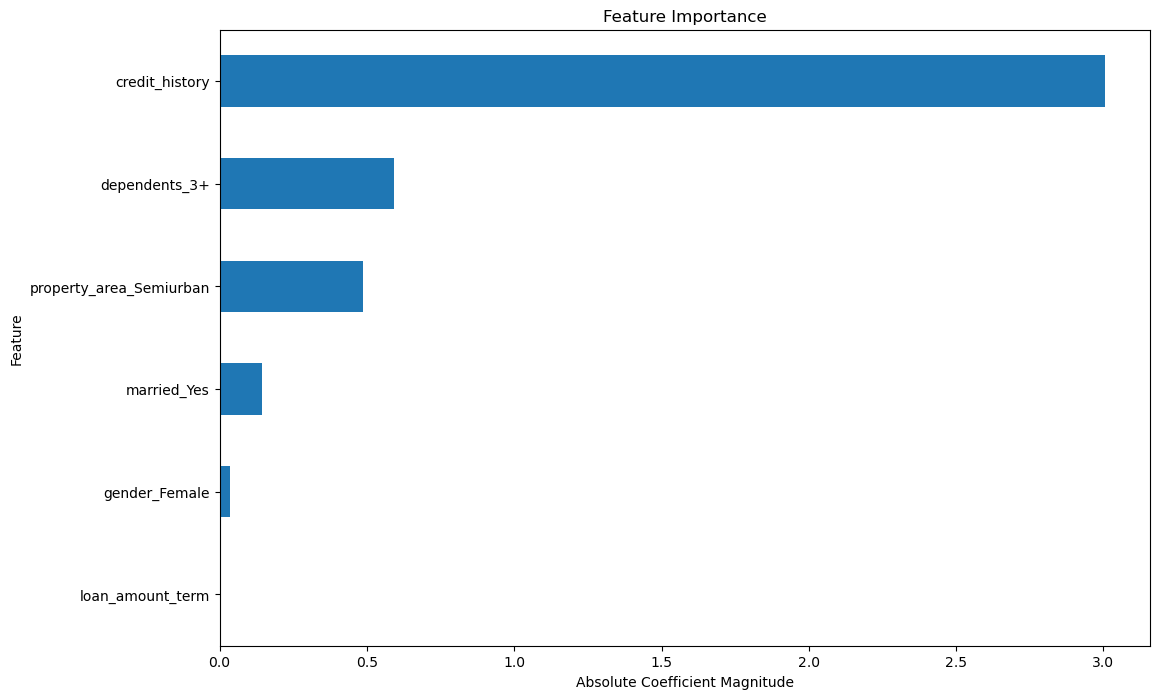

In [74]:
feat_model = joblib.load('./artifacts/model_1.pkl')

# Get coefficients of features
coefficients = feat_model.named_steps.logisticregression.coef_[0]

# Get feature names
features = feat_model.named_steps["onehotencoder"].get_feature_names()

# Create a Series of features
feat_imp = pd.Series(data=coefficients, index=features)

plot_feat_imp = feat_imp.sort_values(ascending=True).tail(6)
plot_feat_imp.plot(kind="barh", figsize=(12,8))
plt.title("Feature Importance")
plt.xlabel("Absolute Coefficient Magnitude")
plt.ylabel("Feature")
plt.show()

# Saving importance values
feat_imp.to_csv('./artifacts/feature_importance.csv')

### Making predictions on validation data

In [75]:
test_model = joblib.load('./artifacts/final_model.pkl')

test_data = prepare_data('./data-for-project-1/validation.csv')

test_data['total_income'] = test_data['applicant_income'] + test_data['coapplicant_income']
test_data.drop(columns=['loan_amount', 'credit_history'], inplace=True)

ohe_2_test = OneHotEncoder(handle_unknown='ignore', cols=['gender','married','dependents','education','self_employed','loan_amount_term','property_area'])
ohe_2_test.fit(test_data)
# Encode categorical columns
X_test_encoded = ohe_2_test.transform(test_data)
if X_test_encoded.shape[1] < X_train_scaled_2.shape[1]:
    # Add missing columns with default values (e.g., 0)
    missing_columns = set(X_train_deep_2.columns) - set(test_data.columns)
    for col in missing_columns:
        X_test_encoded[col] = 0

X_test_encoded = X_test_encoded[X_train_deep_2.columns]
X_test_scaled = scaler_2.transform(X_test_encoded)

predictions = test_model.predict(X_test_scaled)
binary_predictions = (predictions >= 0.5).astype(int)
binary_predictions_labels = ['yes' if pred == 1 else 'no' for pred in binary_predictions]

output_df = pd.DataFrame({'Predicted_Loan_Status': binary_predictions_labels})
output_df.to_csv('./artifacts/predictions.csv', index=False)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


The ChatGPT template was used for the web application development. Bugs were addressed and the code is present in the web_application notebook in out [GitHub reposity](https://github.com/MichaelPautz28/Machine-Learning-382-Project1-Group_J.git)

[Group J GitHub repository](https://github.com/MichaelPautz28/Machine-Learning-382-Project1-Group_J.git)

The web_application python file in the [repository](https://github.com/MichaelPautz28/Machine-Learning-382-Project1-Group_J.git), together with the requirements text file, were used to deploy the DASH web application on a [web service](https://machine-learning-382-project1-group-j-bix0.onrender.com/).